# Stocks Dividends Portfolio

## Stocks with Dividend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fetch dividend
import yfinance as yfd
# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['ALX','BLK','SPG','LMT']
start = '2007-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  4 of 4 downloaded


,ALX,BLK,LMT,SPG
Date,,,,
2007-01-03,208.987381,112.491104,61.646606,58.193890
2007-01-04,211.089661,113.702179,61.485687,58.176723
2007-01-05,208.987381,113.673111,61.706947,56.832024
2007-01-08,206.252060,115.768974,62.826824,57.072353
2007-01-09,203.383163,116.501350,62.766479,58.256832


In [3]:
df.tail()

,ALX,BLK,LMT,SPG
Date,,,,
2018-12-24,281.160370,353.485718,240.515366,154.867905
2018-12-26,287.372498,372.500122,246.792572,160.651596
2018-12-27,287.989899,378.919647,254.805847,161.297440
2018-12-28,289.272217,379.339813,256.247650,162.039688
2018-12-31,289.462189,383.824707,256.816528,161.933655


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
12 years


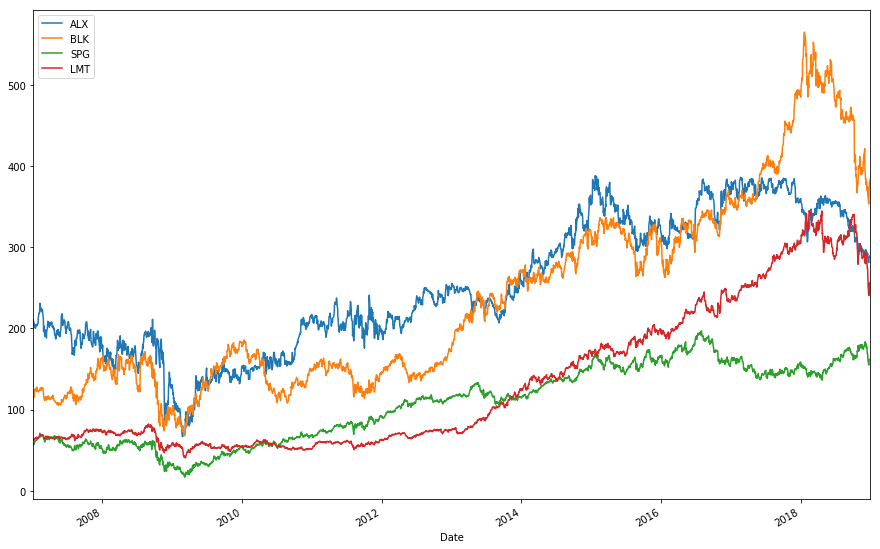

In [5]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [6]:
for s in symbols:
    print(s + ":",  df[s].max())

ALX: 388.36132799999996
BLK: 565.389099
SPG: 196.977982
LMT: 345.199554


In [7]:
for s in symbols:
    print(s + ":",  df[s].min())

ALX: 66.632317
BLK: 67.951302
SPG: 16.625681
LMT: 40.680321


In [8]:
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = (np.log(1 + df[s].pct_change())).dropna()
    
returns.head(4)

,ALX Return,BLK Return,SPG Return,LMT Return
Date,,,,
2007-01-04,0.010009,0.010708,-0.000295,-0.002614
2007-01-05,-0.010009,-0.000256,-0.023385,0.003592
2007-01-08,-0.013175,0.018270,0.004220,0.017986
2007-01-09,-0.014007,0.006306,0.020542,-0.000961


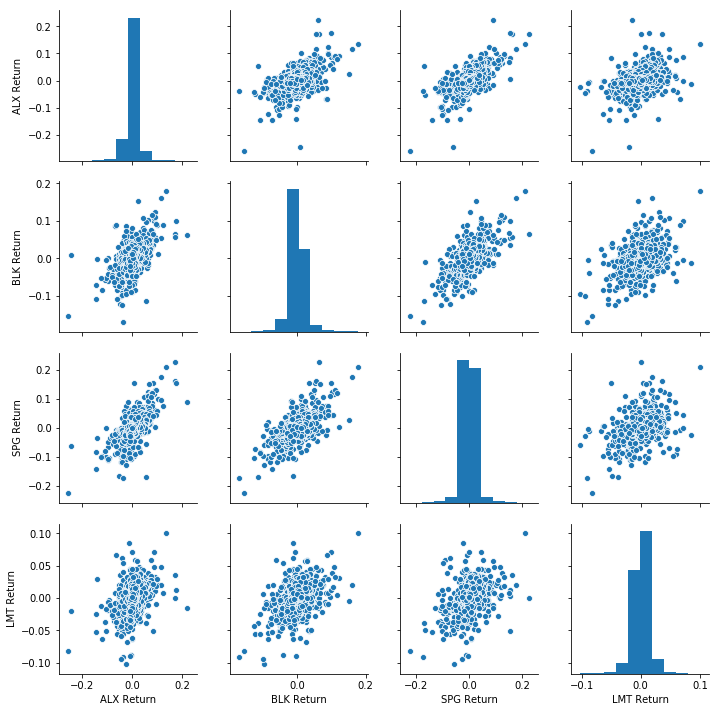

In [9]:
sns.pairplot(returns[1:])

In [10]:
# dates each bank stock had the best and worst single day returns. 
print('Best Day Returns')
print('-'*20)
print(returns.idxmax())
print('\n')
print('Worst Day Returns')
print('-'*20)
print(returns.idxmin())

Best Day Returns
--------------------
ALX Return   2009-05-04
BLK Return   2008-10-28
SPG Return   2008-11-24
LMT Return   2008-10-28
dtype: datetime64[ns]


Worst Day Returns
--------------------
ALX Return   2008-12-01
BLK Return   2008-10-15
SPG Return   2008-12-01
LMT Return   2008-10-21
dtype: datetime64[ns]


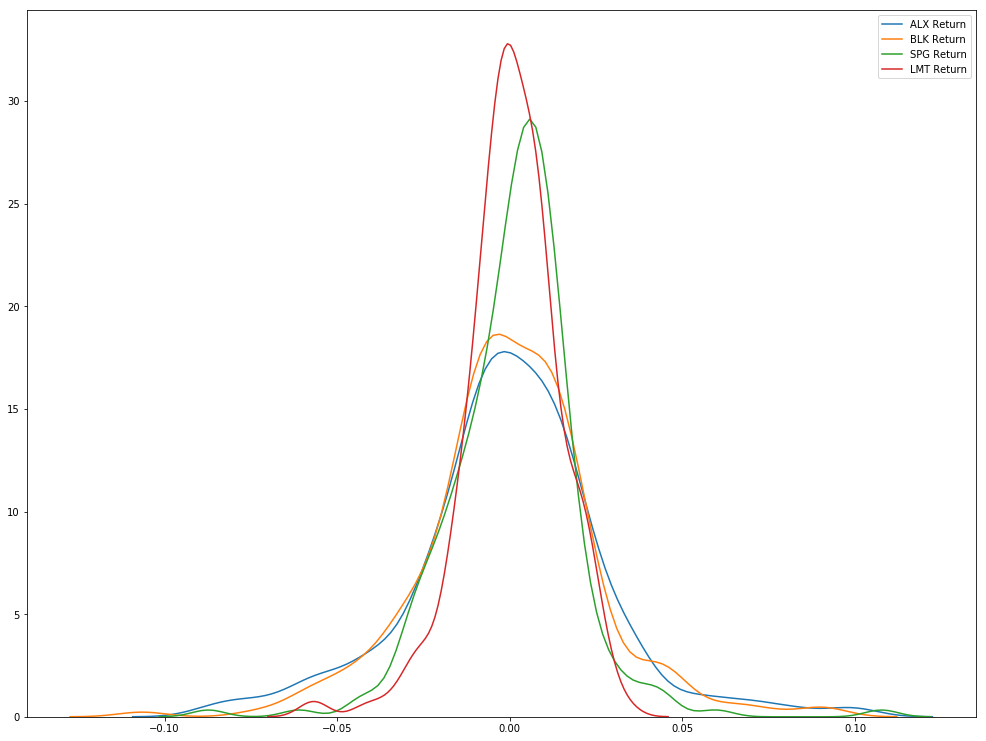

In [11]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.ix["2011-01-01" : "2011-12-31 "][r])

In [12]:
returns.corr()

,ALX Return,BLK Return,SPG Return,LMT Return
ALX Return,1.000000,0.522902,0.646432,0.364725
BLK Return,0.522902,1.000000,0.620884,0.458822
SPG Return,0.646432,0.620884,1.000000,0.388229
LMT Return,0.364725,0.458822,0.388229,1.000000


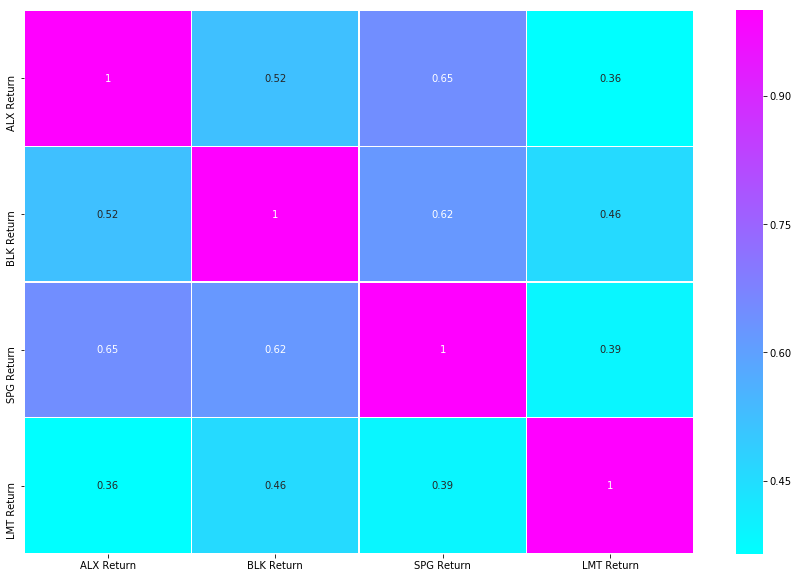

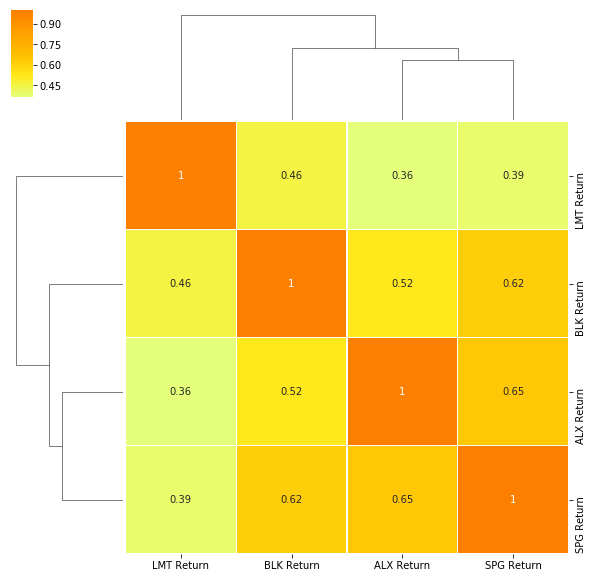

In [13]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="cool",linewidths=.1, annot= True)

sns.clustermap(returns.corr(), cmap="Wistia",linewidths=.1, annot= True)

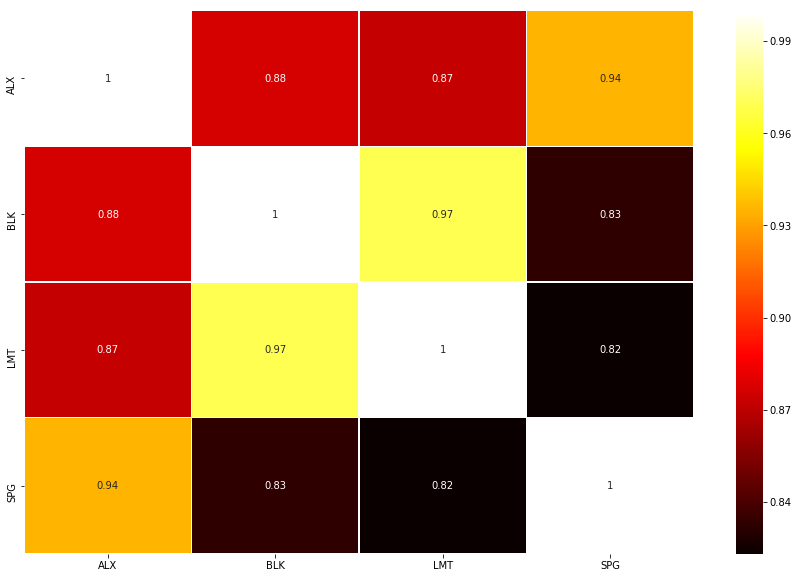

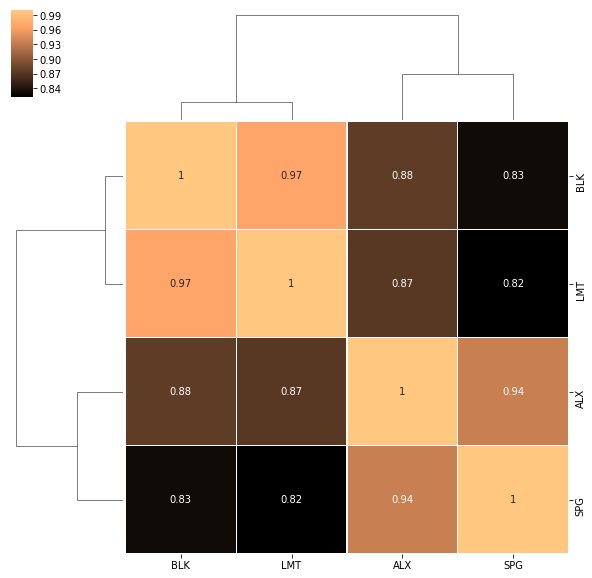

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="hot",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="copper",linewidths=.1, annot= True)

In [15]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
ALX: 25000.0
BLK: 25000.0
LMT: 25000.0
SPG: 25000.0


In [16]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ALX: 119
BLK: 222
LMT: 405
SPG: 429


In [17]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ALX: $24869.5
BLK: $24973.03
LMT: $24966.88
SPG: $24965.18


In [18]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ALX: $34446.0
BLK: $85209.08
LMT: $104010.69
SPG: $69469.54


In [19]:
result = []
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $293135.31


In [22]:
stock = yfd.Tickers('ALX BLK SPG LMT')
stock

Tickers(LMT=Ticker object <LMT>, BLK=Ticker object <BLK>, ALX=Ticker object <ALX>, SPG=Ticker object <SPG>)

In [25]:
s1_dividend = stock.ALX.dividends['2007-01-01':].sum()
s2_dividend = stock.BLK.dividends['2007-01-01':].sum()
s3_dividend = stock.SPG.dividends['2007-01-01':].sum()
s4_dividend = stock.LMT.dividends['2007-01-01':].sum()

In [26]:
data = [s1_dividend, s2_dividend, s3_dividend, s4_dividend]

In [27]:
print('Total Dividends:')
data = [s1_dividend, s2_dividend, s3_dividend, s4_dividend]
for i, x in zip(df.columns, data):
    print('{}: {}'.format(i, x))

Total Dividends:
ALX: 270.5
BLK: 91.06999999999998
LMT: 63.44815
SPG: 62.46000000000001


In [39]:
print('Dividends with Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
data = [s1_dividend, s2_dividend, s3_dividend, s4_dividend]
for i, x, y in zip(df.columns, percent_invest, data):
    cost = x * Cash
    shares = int(cost/y)
    total_dividend_cost = shares * y
    print('{}: ${}'.format(i, round(total_dividend_cost,2)))

Dividends with Shares:
ALX: $24886.0
BLK: $24953.18
LMT: $24998.57
SPG: $24984.0


In [40]:
dividend = []
percent_invest = [0.25, 0.25, 0.25, 0.25]
data = [s1_dividend, s2_dividend, s3_dividend, s4_dividend]
for i, x, y in zip(df.columns, percent_invest, data):
    cost = x * Cash
    shares = int(cost/y)
    total_dividend_cost = shares * y
    dividend.append(total_dividend_cost)
print('Total Dividends: $%s' % round(sum(dividend),2))

Total Dividends: $99821.75


In [52]:
print('Total Money: $%s' % round((sum(dividend) + sum(result)),2))
print('Total Profit: $%s' % (round((sum(dividend) + sum(result)),2) - Cash))

Total Money: $392957.06
Total Profit: $292957.06
